In [55]:
!pip install opendatasets
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import opendatasets as od
import pandas

In [56]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
        directory = r"/kaggle/input/chest-xray-pneumonia/chest_xray/train",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [57]:
validation = ImageDataGenerator(rescale=1./255)
val = validation.flow_from_directory(
    
        directory = r"/kaggle/input/chest-xray-pneumonia/chest_xray/val",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary'
)

Found 16 images belonging to 2 classes.


In [58]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    
        directory = r"/kaggle/input/chest-xray-pneumonia/chest_xray/test",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [59]:
cnn = tf.keras.Sequential([
    tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (64,64,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 8193      
Total params: 23,595,905
Trainable params: 23,542,785
Non-trainable params: 53,120
_________________________________________________________________


In [60]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
history = cnn.fit(x = training_set, validation_data = val, epochs=1)

163/163 [==============================] - 215s 1s/step - loss: 0.2357 - accuracy: 0.9170 - val_loss: 66.1433 - val_accuracy: 0.5000


In [62]:
test_loss, test_acc = cnn.evaluate(test_set, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

20/20 - 11s - loss: 49.5491 - accuracy: 0.6250
The accuracy of the model is:
0.625


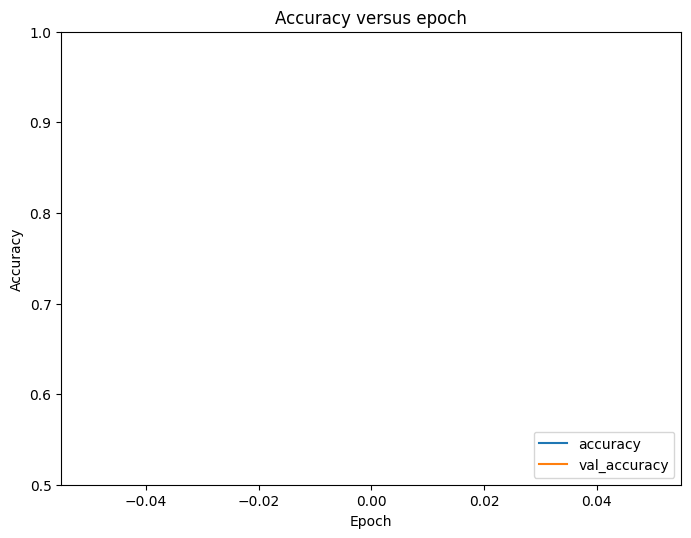

In [63]:
plt.figure(0,(8,6),100)
plt.title("Accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig('Accuracy.png')
plt.show()